In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
# import glob

# # CSV 파일들이 저장된 디렉토리 경로 (변경 필요)
# input_directory = '/content/drive/MyDrive/Final_Project/중국 중요도시/*.csv'

# # 파일 목록 가져오기
# csv_files = glob.glob(input_directory)

# # 빈 리스트를 만들어서 모든 DataFrame을 저장
# dataframes = []

# # 각 CSV 파일을 읽어와서 리스트에 추가
# for file in csv_files:
#     df = pd.read_csv(file)
#     dataframes.append(df)

# # 모든 DataFrame을 하나로 합치기
# combined_df = pd.concat(dataframes, ignore_index=True)

# # 합쳐진 DataFrame을 새로운 CSV 파일로 저장
# combined_df.to_csv('/content/drive/MyDrive/Final_Project/중국 중요도시/combined_file.csv', index=False)


In [4]:
# CSV 파일 읽기
china_df = pd.read_csv('/content/drive/MyDrive/Final_Project/중국 중요도시/combined_file.csv')
kor_df = pd.read_csv('/content/drive/MyDrive/Final_Project/한국 주요도시/combined_file.csv')

In [5]:
china_df

,date,pm25,pm10,o3,no2,so2,co
0,2024/9/1,47,8,43,7,,1
1,2024/9/2,17,,,,,
2,2024/8/1,44,35,58,13,,6
3,2024/8/2,72,32,53,9,,7
4,2024/8/3,80,25,64,6,,6
...,...,...,...,...,...,...,...
80622,2017/9/10,,30,36,14,1,6
80623,2017/1/1,,111,21,35,9,10
80624,2016/1/3,,176,34,27,16,16
80625,2014/12/31,,72,51,28,20,100


In [6]:
# 컬럼명 공백 제거
china_df.columns = china_df.columns.str.strip()

# 날짜 컬럼을 datetime 타입으로 변환
china_df['date'] = pd.to_datetime(china_df['date'], format='%Y/%m/%d')

# 나머지 컬럼을 실수(float) 타입으로 변환
for column in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    if column in china_df.columns:
        china_df[column] = pd.to_numeric(china_df[column], errors='coerce')

# 결과 확인
print(china_df.dtypes)
print(china_df.head())


date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object
        date  pm25  pm10    o3   no2  so2   co
0 2024-09-01  47.0   8.0  43.0   7.0  NaN  1.0
1 2024-09-02  17.0   NaN   NaN   NaN  NaN  NaN
2 2024-08-01  44.0  35.0  58.0  13.0  NaN  6.0
3 2024-08-02  72.0  32.0  53.0   9.0  NaN  7.0
4 2024-08-03  80.0  25.0  64.0   6.0  NaN  6.0


In [7]:
# 날짜로 정렬
china_df = china_df.sort_values(by='date')

china_df=china_df.dropna()

In [8]:
china_df

,date,pm25,pm10,o3,no2,so2,co
80527,2014-01-01,188.0,213.0,18.0,67.0,48.0,500.0
49959,2014-01-01,194.0,144.0,26.0,77.0,36.0,500.0
57717,2014-01-01,207.0,183.0,31.0,27.0,40.0,500.0
61531,2014-01-01,197.0,104.0,59.0,47.0,21.0,16.0
69242,2014-01-01,165.0,148.0,15.0,61.0,44.0,18.0
...,...,...,...,...,...,...,...
76748,2024-09-01,96.0,55.0,43.0,9.0,4.0,6.0
50059,2024-09-01,95.0,51.0,29.0,7.0,4.0,11.0
46180,2024-09-01,75.0,30.0,44.0,8.0,3.0,8.0
26742,2024-09-01,91.0,44.0,59.0,20.0,2.0,7.0


In [9]:
# 전체 데이터프레임에서 NaN 값 확인
print(china_df.isna())

# NaN 값의 위치를 Boolean DataFrame으로 반환
print(china_df.isna().sum())

        date   pm25   pm10     o3    no2    so2     co
80527  False  False  False  False  False  False  False
49959  False  False  False  False  False  False  False
57717  False  False  False  False  False  False  False
61531  False  False  False  False  False  False  False
69242  False  False  False  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...
76748  False  False  False  False  False  False  False
50059  False  False  False  False  False  False  False
46180  False  False  False  False  False  False  False
26742  False  False  False  False  False  False  False
11567  False  False  False  False  False  False  False

[55883 rows x 7 columns]
date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64


In [10]:
kor_df

,date,pm25,pm10,o3,no2,so2,co
0,2024/9/1,77,17,23,15,4,4
1,2024/9/2,41,,,,,
2,2024/8/1,40,30,40,11,3,3
3,2024/8/2,57,35,54,9,3,4
4,2024/8/3,82,31,79,10,3,5
...,...,...,...,...,...,...,...
73120,2019/9/4,,,9,13,5,7
73121,2019/9/5,,,13,12,5,7
73122,2019/9/6,,,18,3,5,5
73123,2019/9/7,,,26,12,7,8


In [11]:
# 컬럼명 공백 제거
kor_df.columns = kor_df.columns.str.strip()

# 날짜 컬럼을 datetime 타입으로 변환
kor_df['date'] = pd.to_datetime(kor_df['date'], format='%Y/%m/%d')

# 나머지 컬럼을 실수(float) 타입으로 변환
for column in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    if column in kor_df.columns:
        kor_df[column] = pd.to_numeric(kor_df[column], errors='coerce')

kor_df=kor_df.dropna()

# 결과 확인
print(kor_df.dtypes)
print(kor_df.head())

date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object
        date  pm25  pm10    o3   no2  so2   co
0 2024-09-01  77.0  17.0  23.0  15.0  4.0  4.0
2 2024-08-01  40.0  30.0  40.0  11.0  3.0  3.0
3 2024-08-02  57.0  35.0  54.0   9.0  3.0  4.0
4 2024-08-03  82.0  31.0  79.0  10.0  3.0  5.0
5 2024-08-04  76.0  31.0  54.0  15.0  3.0  5.0


In [12]:
# 날짜로 정렬
kor_df = kor_df.sort_values(by='date')

# 전체 데이터프레임에서 NaN 값 확인
print(kor_df.isna())

# NaN 값의 위치를 Boolean DataFrame으로 반환
print(kor_df.isna().sum())

        date   pm25   pm10     o3    no2    so2     co
3552   False  False  False  False  False  False  False
72836  False  False  False  False  False  False  False
72837  False  False  False  False  False  False  False
3553   False  False  False  False  False  False  False
3554   False  False  False  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...
55955  False  False  False  False  False  False  False
22967  False  False  False  False  False  False  False
41973  False  False  False  False  False  False  False
65579  False  False  False  False  False  False  False
0      False  False  False  False  False  False  False

[61661 rows x 7 columns]
date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64


In [13]:
# 중국 날짜를 3일 앞당김
china_df['date'] = china_df['date'] - pd.Timedelta(days=3)
china_df = china_df[china_df['date'] >= '2015-01-01']
# 날짜별 평균 계산
china_df = china_df.groupby('date').mean().reset_index()
china_df

,date,pm25,pm10,o3,no2,so2,co
0,2015-01-01,239.222222,140.555556,29.944444,43.111111,33.222222,37.666667
1,2015-01-02,188.285714,75.714286,25.071429,23.500000,19.714286,12.785714
2,2015-01-03,131.285714,86.285714,17.285714,28.500000,28.428571,16.000000
3,2015-01-04,153.071429,112.642857,17.357143,36.500000,35.357143,20.571429
4,2015-01-05,189.000000,132.428571,21.357143,43.285714,34.571429,20.428571
...,...,...,...,...,...,...,...
3511,2024-08-25,76.500000,33.000000,66.375000,11.250000,3.250000,5.250000
3512,2024-08-26,67.875000,35.625000,70.500000,11.000000,3.000000,5.375000
3513,2024-08-27,76.875000,32.500000,57.000000,9.375000,2.375000,4.875000
3514,2024-08-28,74.833333,34.500000,73.333333,9.333333,2.750000,5.666667


In [14]:
kor_df = kor_df[kor_df['date'] >= '2015-01-01']
# 날짜별 평균 계산
kor_df = kor_df.groupby('date').mean().reset_index()
kor_df

,date,pm25,pm10,o3,no2,so2,co
0,2015-01-01,54.000000,29.500000,16.500000,22.000000,8.500000,4.000000
1,2015-01-02,57.500000,39.000000,5.000000,41.500000,11.000000,7.000000
2,2015-01-03,77.000000,41.500000,4.000000,54.000000,10.000000,7.500000
3,2015-01-04,85.000000,64.000000,3.500000,58.000000,11.500000,10.500000
4,2015-01-05,122.500000,37.000000,19.000000,22.500000,7.500000,5.500000
...,...,...,...,...,...,...,...
3449,2024-08-28,38.631579,17.631579,45.052632,11.736842,3.631579,3.210526
3450,2024-08-29,30.550000,18.050000,45.000000,12.550000,3.800000,3.300000
3451,2024-08-30,32.300000,31.400000,69.500000,12.600000,3.700000,4.550000
3452,2024-08-31,61.900000,29.000000,58.350000,10.350000,3.500000,4.450000


In [15]:
# 날짜 교집합 찾기
common_dates = pd.merge(kor_df[['date']], china_df[['date']], on='date', how='inner')['date']

# 교집합 날짜를 기준으로 데이터프레임 필터링
kor_df = kor_df[kor_df['date'].isin(common_dates)]
china_df = china_df[china_df['date'].isin(common_dates)]

In [16]:
kor_df

,date,pm25,pm10,o3,no2,so2,co
0,2015-01-01,54.000000,29.500000,16.500000,22.000000,8.500000,4.000000
1,2015-01-02,57.500000,39.000000,5.000000,41.500000,11.000000,7.000000
2,2015-01-03,77.000000,41.500000,4.000000,54.000000,10.000000,7.500000
3,2015-01-04,85.000000,64.000000,3.500000,58.000000,11.500000,10.500000
4,2015-01-05,122.500000,37.000000,19.000000,22.500000,7.500000,5.500000
...,...,...,...,...,...,...,...
3446,2024-08-25,84.650000,35.450000,54.000000,17.150000,3.100000,5.350000
3447,2024-08-26,83.368421,29.105263,36.157895,16.368421,3.263158,4.631579
3448,2024-08-27,65.944444,18.277778,44.555556,14.111111,3.777778,3.833333
3449,2024-08-28,38.631579,17.631579,45.052632,11.736842,3.631579,3.210526


In [17]:
china_df

,date,pm25,pm10,o3,no2,so2,co
0,2015-01-01,239.222222,140.555556,29.944444,43.111111,33.222222,37.666667
1,2015-01-02,188.285714,75.714286,25.071429,23.500000,19.714286,12.785714
2,2015-01-03,131.285714,86.285714,17.285714,28.500000,28.428571,16.000000
3,2015-01-04,153.071429,112.642857,17.357143,36.500000,35.357143,20.571429
4,2015-01-05,189.000000,132.428571,21.357143,43.285714,34.571429,20.428571
...,...,...,...,...,...,...,...
3511,2024-08-25,76.500000,33.000000,66.375000,11.250000,3.250000,5.250000
3512,2024-08-26,67.875000,35.625000,70.500000,11.000000,3.000000,5.375000
3513,2024-08-27,76.875000,32.500000,57.000000,9.375000,2.375000,4.875000
3514,2024-08-28,74.833333,34.500000,73.333333,9.333333,2.750000,5.666667


In [18]:
extra_df = pd.read_csv('/content/drive/MyDrive/Final_Project/한국 기상정보/한국 풍속 습도 기압(2015~2024).csv',encoding='cp949')

In [19]:
extra_df

,area,date,Wind Speed(m/s),Humidity(%),Atmospheric Pressure(hPa)
0,대관령,2015-01-01,5.9,52.4,924.4
1,대관령,2015-01-02,5.3,53.3,926.4
2,대관령,2015-01-03,5.2,47.4,926.7
3,대관령,2015-01-04,4.8,77.4,924.6
4,대관령,2015-01-05,2.6,61.4,924.4
...,...,...,...,...,...
67310,영덕,2024-08-31,2.9,80.4,1002.6
67311,영덕,2024-09-01,2.1,79.6,1002.8
67312,영덕,2024-09-02,3.7,77.3,1005.2
67313,영덕,2024-09-03,4.0,76.8,1009.4


In [20]:
# 날짜 컬럼을 datetime 타입으로 변환
extra_df['date'] = pd.to_datetime(extra_df['date'], format='%Y-%m-%d')

extra_df=extra_df.dropna()
extra_df = extra_df.drop(columns=['area','Atmospheric Pressure(hPa)'])
# 결과 확인
print(extra_df.dtypes)
print(extra_df.head())

date               datetime64[ns]
Wind Speed(m/s)           float64
Humidity(%)               float64
dtype: object
        date  Wind Speed(m/s)  Humidity(%)
0 2015-01-01              5.9         52.4
1 2015-01-02              5.3         53.3
2 2015-01-03              5.2         47.4
3 2015-01-04              4.8         77.4
4 2015-01-05              2.6         61.4


In [21]:
# 날짜별 평균 계산
extra_df = extra_df.groupby('date').mean().reset_index()
extra_df

,date,Wind Speed(m/s),Humidity(%)
0,2015-01-01,4.820000,53.105000
1,2015-01-02,3.470000,55.110000
2,2015-01-03,2.265000,58.300000
3,2015-01-04,1.845000,71.630000
4,2015-01-05,1.910000,76.380000
...,...,...,...
3530,2024-08-31,2.078947,74.542105
3531,2024-09-01,1.778947,75.089474
3532,2024-09-02,1.984211,79.268421
3533,2024-09-03,2.547368,70.868421


In [22]:
extra_df = extra_df[extra_df['date'].isin(common_dates)]
extra_df

,date,Wind Speed(m/s),Humidity(%)
0,2015-01-01,4.820000,53.105000
1,2015-01-02,3.470000,55.110000
2,2015-01-03,2.265000,58.300000
3,2015-01-04,1.845000,71.630000
4,2015-01-05,1.910000,76.380000
...,...,...,...
3524,2024-08-25,1.373684,81.384211
3525,2024-08-26,1.310526,82.263158
3526,2024-08-27,2.021053,82.384211
3527,2024-08-28,3.073684,74.573684


In [23]:
extra_df.to_csv('/content/drive/MyDrive/Final_Project/extra_data.csv', index=False)
kor_df.to_csv('/content/drive/MyDrive/Final_Project/kor_data.csv', index=False)
china_df.to_csv('/content/drive/MyDrive/Final_Project/china_data.csv', index=False)

In [42]:
# 데이터프레임 병합
merged_df = pd.merge(kor_df, china_df, on='date', suffixes=('_kor_df', '_china_df'))
merged_df = pd.merge(merged_df, extra_df, on='date')
merged_df.to_csv('/content/drive/MyDrive/Final_Project/FINEDUST_FASTAPI/predict_df.csv', index=False)
merged_df

,date,pm25_kor_df,pm10_kor_df,o3_kor_df,no2_kor_df,so2_kor_df,co_kor_df,pm25_china_df,pm10_china_df,o3_china_df,no2_china_df,so2_china_df,co_china_df,Wind Speed(m/s),Humidity(%)
0,2015-01-01,54.000000,29.500000,16.500000,22.000000,8.500000,4.000000,239.222222,140.555556,29.944444,43.111111,33.222222,37.666667,4.820000,53.105000
1,2015-01-02,57.500000,39.000000,5.000000,41.500000,11.000000,7.000000,188.285714,75.714286,25.071429,23.500000,19.714286,12.785714,3.470000,55.110000
2,2015-01-03,77.000000,41.500000,4.000000,54.000000,10.000000,7.500000,131.285714,86.285714,17.285714,28.500000,28.428571,16.000000,2.265000,58.300000
3,2015-01-04,85.000000,64.000000,3.500000,58.000000,11.500000,10.500000,153.071429,112.642857,17.357143,36.500000,35.357143,20.571429,1.845000,71.630000
4,2015-01-05,122.500000,37.000000,19.000000,22.500000,7.500000,5.500000,189.000000,132.428571,21.357143,43.285714,34.571429,20.428571,1.910000,76.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,2024-08-25,84.650000,35.450000,54.000000,17.150000,3.100000,5.350000,76.500000,33.000000,66.375000,11.250000,3.250000,5.250000,1.373684,81.384211
3439,2024-08-26,83.368421,29.105263,36.157895,16.368421,3.263158,4.631579,67.875000,35.625000,70.500000,11.000000,3.000000,5.375000,1.310526,82.263158
3440,2024-08-27,65.944444,18.277778,44.555556,14.111111,3.777778,3.833333,76.875000,32.500000,57.000000,9.375000,2.375000,4.875000,2.021053,82.384211
3441,2024-08-28,38.631579,17.631579,45.052632,11.736842,3.631579,3.210526,74.833333,34.500000,73.333333,9.333333,2.750000,5.666667,3.073684,74.573684


In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3443 entries, 0 to 3442
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             3443 non-null   datetime64[ns]
 1   pm25_kor_df      3443 non-null   float64       
 2   pm10_kor_df      3443 non-null   float64       
 3   o3_kor_df        3443 non-null   float64       
 4   no2_kor_df       3443 non-null   float64       
 5   so2_kor_df       3443 non-null   float64       
 6   co_kor_df        3443 non-null   float64       
 7   pm25_china_df    3443 non-null   float64       
 8   pm10_china_df    3443 non-null   float64       
 9   o3_china_df      3443 non-null   float64       
 10  no2_china_df     3443 non-null   float64       
 11  so2_china_df     3443 non-null   float64       
 12  co_china_df      3443 non-null   float64       
 13  Wind Speed(m/s)  3443 non-null   float64       
 14  Humidity(%)      3443 non-null   float64

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


merged_df.set_index('date', inplace=True)

# 결측치 처리
merged_df.fillna(0, inplace=True)

# 입력 및 예측 변수 분리
input_features = ['pm25_china_df', 'pm10_china_df', 'o3_china_df', 'no2_china_df', 'so2_china_df', 'co_china_df', 'Wind Speed(m/s)', 'Humidity(%)']
target_features = ['pm25_kor_df', 'pm10_kor_df', 'o3_kor_df', 'no2_kor_df', 'so2_kor_df', 'co_kor_df']

X = merged_df[input_features]
y = merged_df[target_features]

# 데이터 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 시퀀스 데이터 생성 함수
def create_sequences(data, targets, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(targets[i+seq_length])
    return np.array(X), np.array(y)

# 하루 단위 시퀀스 생성 (SEQ_LENGTH = 1)
SEQ_LENGTH = 1
X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, input_shape=(SEQ_LENGTH, X_train.shape[2])))
model.add(Dense(len(target_features)))  # 타겟 피처의 수 (6)
model.compile(optimizer='adam', loss='mse')

# LSTM 모델 훈련
model.fit(X_train, y_train, epochs=20, batch_size=32)

# LSTM 예측
lstm_predictions = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, lstm_predictions)
r2 = r2_score(y_test, lstm_predictions)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0551
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 13/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096
Epoch 14/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 15/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 16/20
87/87 ━

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터프레임 준비
new_data = pd.DataFrame({
    'date': ['2024-12-01'],  # 날짜
    'pm25_china_df': [81.9],    # PM2.5
    'pm10_china_df': [37.8],    # PM10
    'o3_china_df': [49.5],      # O3
    'no2_china_df': [10.5],     # NO2
    'so2_china_df': [3.5],      # SO2
    'co_china_df': [6.4],       # CO
    'Wind Speed(m/s)': [3.584211],  # 바람 속도
    'Humidity(%)': [73.3]       # 습도
})

# 날짜 변환 및 인덱스 설정
new_data['date'] = pd.to_datetime(new_data['date'])
new_data.set_index('date', inplace=True)

# 기존 데이터와 동일한 열을 가진 데이터프레임으로 조정
for col in input_features:
    if col not in new_data.columns:
        new_data[col] = 0
new_data = new_data[input_features]  # 열 순서 맞추기

# 입력 데이터 정규화
new_data_scaled = scaler_X.transform(new_data)

# 하루 단위 데이터로 LSTM 모델 예측
SEQ_LENGTH = 1  # 하루 단위 데이터의 시퀀스 길이
X_new = new_data_scaled.reshape(1, SEQ_LENGTH, -1)
lstm_new_predictions = model.predict(X_new)

# 예측 결과를 데이터프레임으로 변환하는 함수
def format_predictions(predictions, feature_names):
    return pd.DataFrame(predictions, columns=feature_names)

# Feature names
feature_names = target_features

# 예측 결과 데이터프레임으로 변환
if lstm_new_predictions.shape[1] == len(feature_names):
    lstm_df = format_predictions(scaler_y.inverse_transform(lstm_new_predictions), feature_names)
else:
    raise ValueError(f"Expected {len(feature_names)} target features, but got {lstm_new_predictions.shape[1]} features from model predictions.")

# 데이터프레임 출력
print("LSTM Predictions on New Data:")
print(lstm_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
LSTM Predictions on New Data:
   pm25_kor_df  pm10_kor_df  o3_kor_df  no2_kor_df  so2_kor_df  co_kor_df
0    50.645416    30.144356  41.127872   18.902031    4.582246   4.285212


In [28]:
import joblib
from tensorflow.keras.models import load_model

# LSTM 모델 저장
model.save('/content/drive/MyDrive/Final_Project/FINEDUST_FASTAPI/lstm_model.keras')

# Scalers 저장
joblib.dump(scaler_X, '/content/drive/MyDrive/Final_Project/FINEDUST_FASTAPI/scaler_X.pkl')
joblib.dump(scaler_y, '/content/drive/MyDrive/Final_Project/FINEDUST_FASTAPI/scaler_y.pkl')

['/content/drive/MyDrive/Final_Project/FINEDUST_FASTAPI/scaler_y.pkl']

In [29]:
from scipy.stats import spearmanr
from matplotlib.colors import Normalize
spearman_corr, p_value = spearmanr(merged_df[['pm25_china_df', 'pm10_china_df','pm25_kor_df', 'pm10_kor_df']])
# 상관계수 행렬을 DataFrame으로 변환
corr_df = pd.DataFrame(spearman_corr, columns=data.columns, index=data.columns)

# 표 출력
print("Spearman Correlation Matrix:\n", corr_df)

# 표를 꾸미기 위해 seaborn 또는 matplotlib을 사용할 수 있습니다
import seaborn as sns
import matplotlib.pyplot as plt

norm = Normalize(vmin=-1, vmax=1)  # 0.4에서 1로 매핑

# 표를 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, norm=norm)
plt.title('Spearman Correlation Matrix', fontsize=16)
plt.show()

NameError: name 'data' is not defined

In [36]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score

# 데이터프레임이 이미 준비되어 있다고 가정
# merged_df['date'] = pd.to_datetime(merged_df['date_column_name'])
# merged_df.set_index('date', inplace=True)
# merged_df = merged_df.asfreq('D')  # 일 단위로 설정

# 입력 및 타겟 변수 분리
target_features = ['pm25_kor_df', 'pm10_kor_df']

# 결과를 저장할 딕셔너리 생성
results = {}

# 각 타겟 변수에 대해 ARIMA 모델 훈련 및 예측
for target in target_features:
    # 타겟 변수를 시계열로 설정
    y = merged_df[target]

    # 자동으로 (p, d, q) 값 선택
    model = auto_arima(y, seasonal=False, stepwise=True, trace=True)

    # 최적 모델 요약 출력
    print(f'Optimal parameters for {target}: {model.order}')

    # ARIMA 모델 훈련
    model_fit = model.fit(y)

    # 예측할 스텝 수를 하루로 설정
    steps_to_forecast = 1  # 하루 예측
    y_pred = model.predict(n_periods=steps_to_forecast)  # 예측 방법 수정

    # 실제 값 가져오기 (가장 최근의 값)
    actual_values = y[-steps_to_forecast:]

    # 모델 평가
    mse = mean_squared_error(actual_values, y_pred)
    r2 = r2_score(actual_values, y_pred)

    # 결과 저장
    results[target] = {
        'MSE': mse,
        'R^2 Score': r2,
        'Predictions': y_pred,
        'Actual Values': actual_values.values
    }

# 결과 출력
for target, metrics in results.items():
    print(f'타겟: {target}')
    print(f'평균 제곱 오차 (MSE): {metrics["MSE"]}')
    print(f'R^2 점수: {metrics["R^2 Score"]}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29677.932, Time=6.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30549.558, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30551.485, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30551.364, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30547.558, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29680.457, Time=2.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29695.296, Time=1.91 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29679.318, Time=5.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29679.750, Time=9.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29906.881, Time=1.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=29677.894, Time=3.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=29684.701, Time=3.89 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=29679.454, Time=9.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=29844.065, Time=1.18 sec
 ARIMA(0,1,4)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27416.369, Time=3.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28313.386, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28282.644, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28224.406, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28311.387, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27414.370, Time=3.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27482.774, Time=2.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27537.608, Time=3.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27416.369, Time=3.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27420.978, Time=1.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27426.025, Time=2.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27418.152, Time=3.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=27412.525, Time=2.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=27480.867, Time=1.47 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [34]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00


In [44]:
!pip install pykalman


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 4.5 MB/s eta 0:00:00


In [52]:
merged_df

,pm25_kor_df,pm10_kor_df,o3_kor_df,no2_kor_df,so2_kor_df,co_kor_df,pm25_china_df,pm10_china_df,o3_china_df,no2_china_df,so2_china_df,co_china_df,Wind Speed(m/s),Humidity(%)
date,,,,,,,,,,,,,,
2015-01-01,54.000000,29.500000,16.500000,22.000000,8.500000,4.000000,239.222222,140.555556,29.944444,43.111111,33.222222,37.666667,4.820000,53.105000
2015-01-02,57.500000,39.000000,5.000000,41.500000,11.000000,7.000000,188.285714,75.714286,25.071429,23.500000,19.714286,12.785714,3.470000,55.110000
2015-01-03,77.000000,41.500000,4.000000,54.000000,10.000000,7.500000,131.285714,86.285714,17.285714,28.500000,28.428571,16.000000,2.265000,58.300000
2015-01-04,85.000000,64.000000,3.500000,58.000000,11.500000,10.500000,153.071429,112.642857,17.357143,36.500000,35.357143,20.571429,1.845000,71.630000
2015-01-05,122.500000,37.000000,19.000000,22.500000,7.500000,5.500000,189.000000,132.428571,21.357143,43.285714,34.571429,20.428571,1.910000,76.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-25,84.650000,35.450000,54.000000,17.150000,3.100000,5.350000,76.500000,33.000000,66.375000,11.250000,3.250000,5.250000,1.373684,81.384211
2024-08-26,83.368421,29.105263,36.157895,16.368421,3.263158,4.631579,67.875000,35.625000,70.500000,11.000000,3.000000,5.375000,1.310526,82.263158
2024-08-27,65.944444,18.277778,44.555556,14.111111,3.777778,3.833333,76.875000,32.500000,57.000000,9.375000,2.375000,4.875000,2.021053,82.384211


Target: pm25_kor_df
Mean Squared Error: 63.455847744137934
R^2 Score: 0.9128593098153882
Predicted next state for pm25_kor_df: 38.544118954994026
---
Target: pm10_kor_df
Mean Squared Error: 31.09988122837151
R^2 Score: 0.9033979552633289
Predicted next state for pm10_kor_df: 18.720096933070604
---


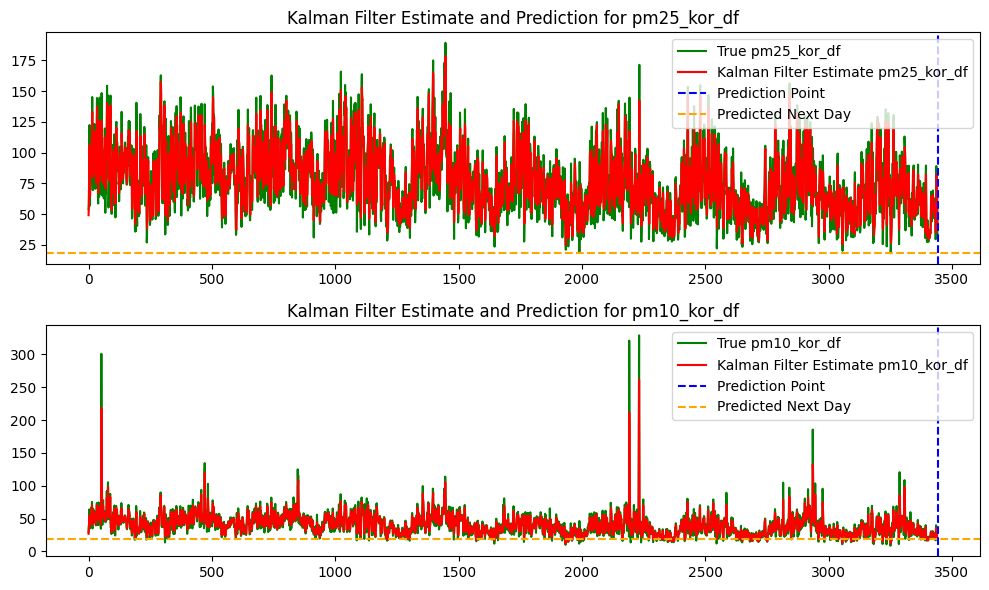

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비
input_features = ['pm25_china_df', 'pm10_china_df', 'o3_china_df', 'no2_kor_df', 'so2_kor_df', 'co_china_df', 'Wind Speed(m/s)', 'Humidity(%)', 'o3_kor_df', 'no2_kor_df', 'so2_kor_df', 'co_kor_df']
target_features = ['pm25_kor_df', 'pm10_kor_df']

X = merged_df[input_features].values
y = merged_df[target_features].values

# 결과를 저장할 딕셔너리
results = {}

# 각 타겟 변수에 대해 Kalman Filter 초기화 및 예측
for i, target in enumerate(target_features):
    # Kalman Filter 초기화
    kf = KalmanFilter(
        transition_matrices=np.eye(len(target_features)),  # 상태 전이 행렬
        observation_matrices=np.eye(len(target_features)),  # 관측 행렬
        initial_state_mean=np.zeros(len(target_features)),  # 초기 상태
        initial_state_covariance=np.eye(len(target_features)),  # 초기 상태 공분산
        observation_covariance=np.eye(len(target_features)) * 0.1,  # 관측 공분산
        transition_covariance=np.eye(len(target_features)) * 0.1  # 상태 전이 공분산
    )

    # 필터 적합 및 상태 추정
    filtered_state_means, _ = kf.filter(y)

    # 하루 뒤 예측
    last_state = filtered_state_means[-1]  # 마지막 상태
    predicted_next_state = np.dot(kf.transition_matrices, last_state)

    # 평가
    mse = mean_squared_error(y[:, i], filtered_state_means[:, i])
    r2 = r2_score(y[:, i], filtered_state_means[:, i])

    results[target] = {
        'MSE': mse,
        'R^2 Score': r2,
        'Predicted Next State': predicted_next_state[i]
    }

# 결과 출력
for target, metrics in results.items():
    print(f'Target: {target}')
    print(f'Mean Squared Error: {metrics["MSE"]}')
    print(f'R^2 Score: {metrics["R^2 Score"]}')
    print(f'Predicted next state for {target}: {metrics["Predicted Next State"]}')
    print('---')

# 결과 시각화
plt.figure(figsize=(10, 6))
for i, target in enumerate(target_features):
    plt.subplot(len(target_features), 1, i + 1)
    plt.plot(y[:, i], label=f'True {target}', color='g')
    plt.plot(filtered_state_means[:, i], label=f'Kalman Filter Estimate {target}', color='r')
    plt.axvline(x=len(y) - 1, color='b', linestyle='--', label='Prediction Point')
    plt.axhline(y=metrics["Predicted Next State"], color='orange', linestyle='--', label='Predicted Next Day')
    plt.legend()
    plt.title(f'Kalman Filter Estimate and Prediction for {target}')

plt.tight_layout()
plt.show()
